Pragat Wagle

Assignment 6 K-means and PCA

### Data preprocessing

The data was checked for outliers and none were found. With the samples there existed no null or empty data. The data was standardized using StandardScaler to ensure both attributes were scaled accordingly.

In [285]:
import pandas as pd
faithful = pd.read_csv("faithful.csv")
faithful

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


In [286]:
faithfulDF = faithful[["eruptions","waiting"]]

Considerations were made to find outliers using a boxplot for both eruptions and wating which showed that there were no outliers seen in the data.

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='eruptions'>

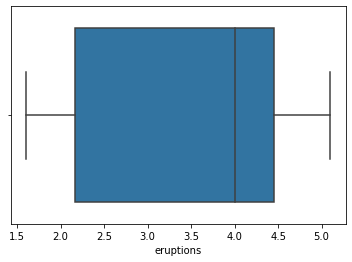

In [287]:
import seaborn as sns
sns.boxplot(faithfulDF['eruptions'])

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='waiting'>

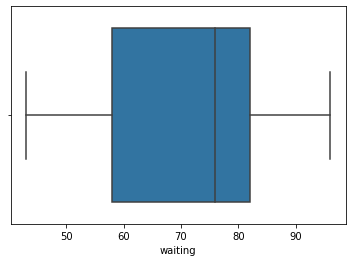

In [288]:
sns.boxplot(faithfulDF['waiting'])

In [289]:
faithfulDF.isna().sum()

eruptions    0
waiting      0
dtype: int64

Standardizing the data consists of subtracting the current value by the average value of the that column and dividing the standard deviation of that data from the difference. The sklearn implementation is used to fit and transform the faithful data set.

In [290]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
scaler = StandardScaler()
data = scaler.fit_transform(faithfulDF)
df = DataFrame(data, columns = ["eruptions", "waiting"])

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='eruptions'>

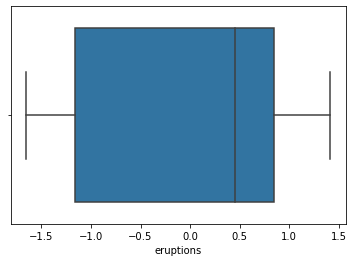

In [291]:
# Box Plot
import seaborn as sns
sns.boxplot(df['eruptions'])

In [292]:
df.head()

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


### 1) K-Means
Below is an implementation of a home grown K-means algorithm to return results. The results with then be visualized to show the different clusters.

This implementation was based off the concepts discussed in https://www.youtube.com/watch?v=hDmNF9JG3lo. 

In [222]:
import numpy as np
from statistics import mean 

def euclidean_distance(x, center):
    return np.sqrt(np.sum((x - center) ** 2))
    

class KMeans:
    def __init__(self, k, maxiter):
        self.groups = k
        self.maxiter = maxiter
    
    def fit(self, X):
        self.X = X
    
    def predict(self):
        centers = np.random.rand(self.groups, 2)
        predictions = {}
        for _ in range(self.maxiter):
            for i in range(len(self.X.values)):
                center = classify_center(self.X.values[i], centers)
                #the value of x and the index of the closest center 
                predictions[i] = center
            center_values = {}
            for c in range(len(centers)):
                center_values[c] = []
                for pred in predictions: 
                    if(predictions[pred] == c):
                        center_values[c].append(self.X.values[pred])
                centers[c] = np.mean(center_values[c], axis = 0)

        # predictions are a dictionary with the data row index as key and value is the group it belongs to        
        # centers an array of the centers that were calculated
        return predictions, centers
                
    def classify_center(x, centers):
        distances = []
        for c in centers:
            distance = euclidean_distance(x, c)
            distances.append(distance)
        sortedDistances = np.argsort(distances)
        #the index center that is closest to the point 
        return sortedDistances[0]    

In [223]:
kmeans = KMeans(4,400)
kmeans.fit(df)
predictions, centers = kmeans.predict()

### Results

Below are the predictions in a dictionary format with the key being the sample and the value the group it was caculated to be in. Below are the centers that were caculated for the 4 groups beginning with 0.

In [235]:
print("Predictions:")
print("Format -->>> {Sample:Group...}:\n")
print(predictions)
print("\n")

for center in range(len(centers)):
    print(f"Center for Group {center}: {centers[center]}")


Predictions:
Format -->>> {Sample:Group...}:

{0: 2, 1: 1, 2: 2, 3: 0, 4: 3, 5: 0, 6: 3, 7: 3, 8: 1, 9: 3, 10: 1, 11: 3, 12: 2, 13: 1, 14: 3, 15: 1, 16: 1, 17: 3, 18: 1, 19: 2, 20: 1, 21: 1, 22: 2, 23: 0, 24: 2, 25: 2, 26: 1, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 0, 33: 2, 34: 2, 35: 1, 36: 1, 37: 3, 38: 1, 39: 3, 40: 2, 41: 1, 42: 3, 43: 1, 44: 2, 45: 2, 46: 0, 47: 1, 48: 3, 49: 1, 50: 2, 51: 3, 52: 1, 53: 3, 54: 1, 55: 3, 56: 2, 57: 1, 58: 2, 59: 2, 60: 1, 61: 3, 62: 1, 63: 3, 64: 1, 65: 3, 66: 2, 67: 2, 68: 0, 69: 2, 70: 2, 71: 1, 72: 2, 73: 2, 74: 1, 75: 2, 76: 1, 77: 2, 78: 2, 79: 2, 80: 2, 81: 3, 82: 2, 83: 0, 84: 2, 85: 3, 86: 2, 87: 2, 88: 1, 89: 3, 90: 1, 91: 3, 92: 1, 93: 2, 94: 1, 95: 2, 96: 3, 97: 2, 98: 1, 99: 3, 100: 0, 101: 3, 102: 1, 103: 3, 104: 2, 105: 1, 106: 3, 107: 1, 108: 3, 109: 2, 110: 2, 111: 1, 112: 3, 113: 2, 114: 1, 115: 3, 116: 1, 117: 3, 118: 1, 119: 3, 120: 1, 121: 2, 122: 2, 123: 1, 124: 3, 125: 2, 126: 1, 127: 3, 128: 1, 129: 3, 130: 1, 131: 3, 132: 0,

Visualization of scatterplot of eruptions on x axis and waiting on the y axis with the centers color coordinated and plotted

In [225]:
import matplotlib.pyplot as plt

### Visualization

Below is a scatter plot of the different groups that were determined from the home grown Kmeans algorithm with the center of the X marking the where the centroid was calcuated to be. Looking at the visualization  

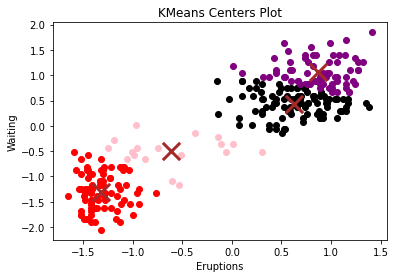

In [227]:
plt.figure()
plt.xlabel("Eruptions")
plt.ylabel("Waiting")
plt.title("KMeans Centers Plot")

for pred in predictions:
    if predictions[pred] == 0:
        plt.scatter(df.values[pred][0], df.values[pred][1], color="pink")        
    if predictions[pred] == 1:
        plt.scatter(df.values[pred][0], df.values[pred][1], color="red")        
    if predictions[pred] == 2:
        plt.scatter(df.values[pred][0], df.values[pred][1], color="black")        
    if predictions[pred] == 3:
        plt.scatter(df.values[pred][0], df.values[pred][1], color="purple")        
    
plt.scatter(centers[0][0],centers[0][1], color="brown", marker = "x", s=300, linewidths=3)
plt.scatter(centers[1][0],centers[1][1], color="brown", marker = "x", s=300, linewidths=3)
plt.scatter(centers[2][0],centers[2][1], color="brown", marker = "x", s=300, linewidths=3)
plt.scatter(centers[3][0],centers[3][1], color="brown", marker = "x", s=300, linewidths=3)
plt.show()

### 2) PCA

Principal component analysis is a dimesionality reduction techique to find princpal components that can explain as certain percent of the total variance it the data. It is generally used for large data set with mutiple attributes.

The below code was implemented using reference to: 

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

The dataset is located in sklearn datasets and is pulled from there.

In [329]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target

From the submodule decomposition in sklearn PCA is imported and used to create 2 components from the 4 features included in the iris dataset.

In [313]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

### Results

In [346]:
print("Original Dataset\n")
print(X)

Original Dataset

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [347]:
print("PCA with 2 components\n")
print(X_pca)

PCA with 2 components

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.

Below is a scatter plot of the two components graphed on a scatter plot with the three different groups graphed against two principal components. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


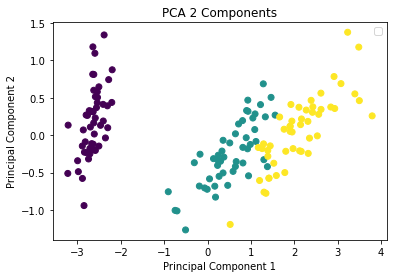

In [330]:
plt.figure()
plt.title("PCA 2 Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.show()

Below is a plot of the same plot as above with different labels of PCA directions and eigen vectors.

[Text(0, -1.5, ''),
 Text(0, -1.0, ''),
 Text(0, -0.5, ''),
 Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, '')]

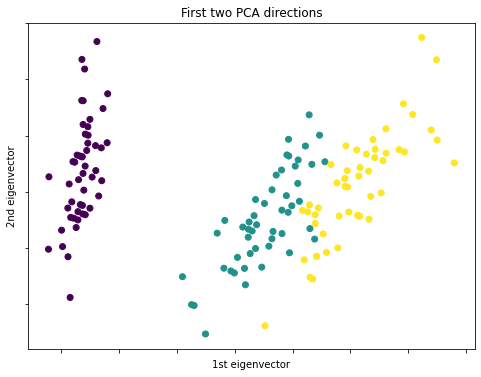

In [340]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y
)

ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])